In [1]:
#import warnings
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_interf = os.pardir+"/data/input_data/AlesModel/2018_interf.csv"
path_orient = os.pardir+"/data/input_data/AlesModel/2018_orient_clust_n_init5_0.csv"
path_dem = os.pardir+"/data/input_data/AlesModel/_cropped_DEM_coarse.tif"

In [3]:
resolution = [100,100,100]
extent = np.array([729550.0, 751500.0, 1913500.0, 1923650.0, -1800.0, 800.0])
geo_model = gp.create_model('Alesmodel')
gp.init_data(geo_model, extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

Active grids: ['regular']


../../gempy/core/data.py:1623: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Alesmodel  2019-10-08 14:04

In [4]:
sdict = {'section1':([732000, 1916000],[745000,1916000],[200,150])}
        #'section2':([740000, 1916000],[745000,1917000],[20,20])} 
geo_model.grid.set_section_grid(sdict)

,start,stop,resolution,dist
section1,"[732000, 1916000]","[745000, 1916000]","[200, 150]",13000.0


In [5]:
print(len(geo_model.orientations.df))
print(len(geo_model.surface_points.df))
print(len(geo_model.surfaces.df))

198
126
7


In [6]:
#sorting of lithologies
gp.map_series_to_surfaces(geo_model,{'fault_left':('fault_left'),
                        'fault_right':('fault_right'),
                        'fault_lr':('fault_lr'),
                        'Trias_Series':('TRIAS','LIAS'), 
                        'Carbon_Series':('CARBO'), 
                        'Basement_Series':('basement')},remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
0,fault_left,fault_left,1,False,#015482,1
2,fault_right,fault_right,1,False,#ffbe00,2
1,fault_lr,fault_lr,1,False,#9f0052,3
3,TRIAS,Trias_Series,1,False,#728f02,4
4,LIAS,Trias_Series,2,False,#443988,5
5,CARBO,Carbon_Series,1,False,#ff3f20,6
6,basement,Basement_Series,1,True,#325916,7


In [7]:
colordict = {'LIAS':'#015482', 'TRIAS': '#9f0052', 'CARBO':'#ffbe00','basement':'#728f02',
            'fault_left':'#2a2a2a','fault_right':'#545454', 'fault_lr': '#a5a391'}
geo_model.surfaces.colors.change_colors(colordict)

,surface,series,order_surfaces,isBasement,color,id
0,fault_left,fault_left,1,False,#2a2a2a,1
2,fault_right,fault_right,1,False,#545454,2
1,fault_lr,fault_lr,1,False,#a5a391,3
3,TRIAS,Trias_Series,1,False,#9f0052,4
4,LIAS,Trias_Series,2,False,#015482,5
5,CARBO,Carbon_Series,1,False,#ffbe00,6
6,basement,Basement_Series,1,True,#728f02,7


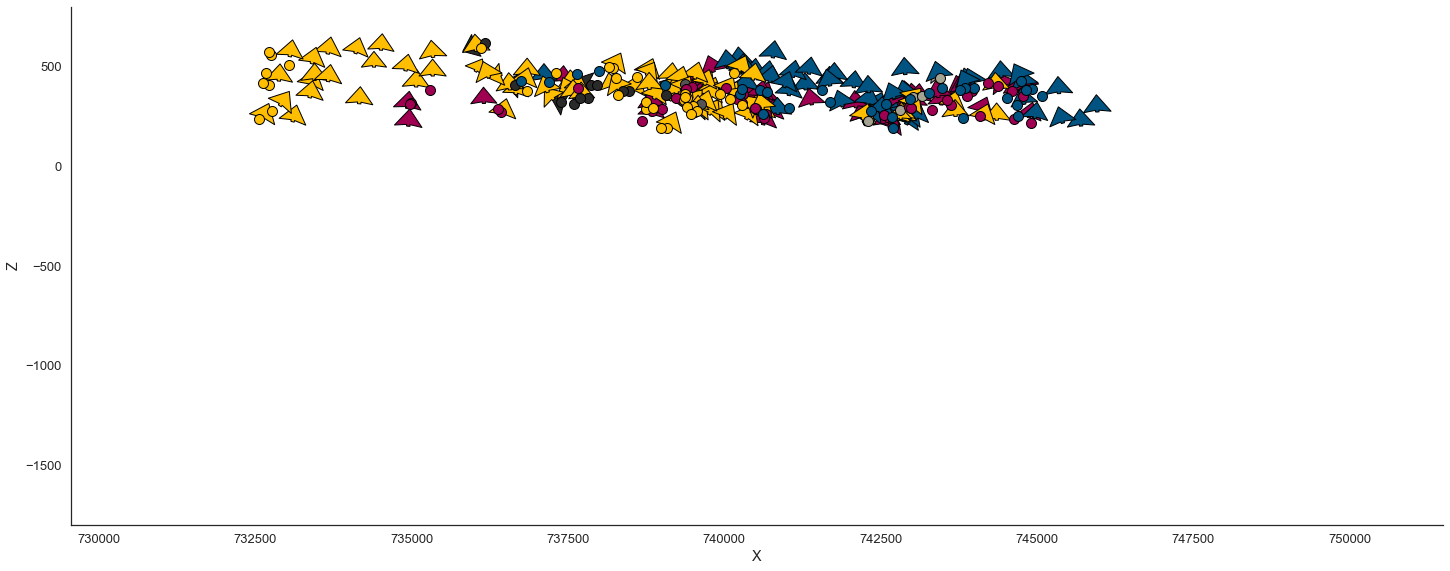

In [8]:
a = gp.plot.plot_data(geo_model,direction='y')

In [9]:
geo_model.rescaling

,values
rescaling factor,26804.2
centers,"[739263.6925, 1917834.9612500002, 402.6439239999999]"


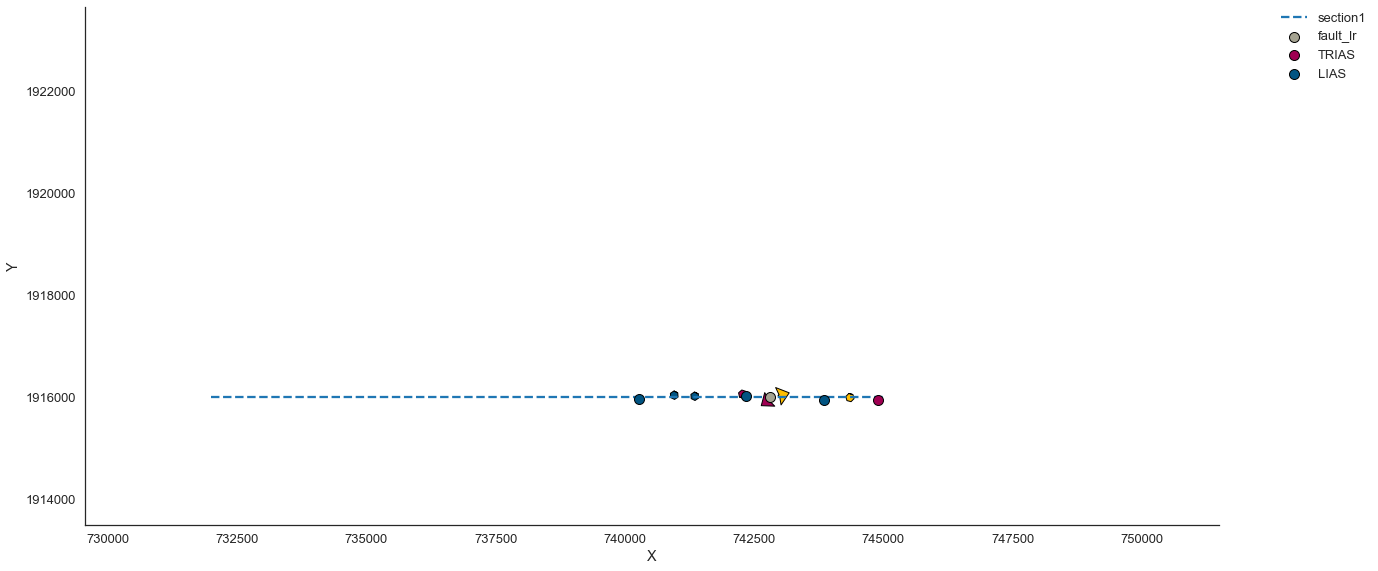

In [10]:
gp.plot.plot_section_traces(geo_model, contour_lines=True, show_all_data=False)

##### Faults

In [11]:
geo_model.set_is_fault(['fault_right', 'fault_left', 'fault_lr'], change_color=True)

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
fault_left,True,False
fault_right,True,False
fault_lr,True,False
Trias_Series,False,False
Carbon_Series,False,False
Basement_Series,False,False


In [12]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_run', dtype='float32',
                          verbose=[])

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float32
Number of faults:  3
Compilation Done!


In [13]:
import gempy
gempy.__path__

['../../gempy']

### Topography

Cropped raster to geo_model.grid.extent.
storing converted file...
Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[ 7.29659750e+05,  1.91355075e+06, -1.78700000e+03],
       [ 7.29659750e+05,  1.91355075e+06, -1.76100000e+03],
       [ 7.29659750e+05,  1.91355075e+06, -1.73500000e+03],
       ...,
       [ 7.45000000e+05,  1.91600000e+06,  7.65100671e+02],
       [ 7.45000000e+05,  1.91600000e+06,  7.82550336e+02],
       [ 7.45000000e+05,  1.91600000e+06,  8.00000000e+02]])

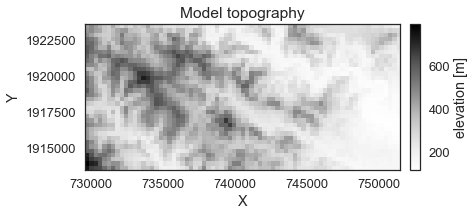

In [14]:
geo_model.set_topography(source='gdal', filepath=path_dem)

In [15]:
geo_model.grid.topography.values[:,2].max()

796.0

In [16]:
from scipy.spatial import Delaunay
tri=Delaunay(geo_model.grid.topography.values[:,:2])

In [17]:
f = tri.simplices

In [18]:
f

array([[1900, 1899, 1826],
       [1900, 1826, 1827],
       [1201, 1129, 1202],
       ...,
       [1622, 1549, 1623],
       [1549, 1477, 1550],
       [1549, 1476, 1477]], dtype=int32)

In [19]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,fault_left,fault_left,1,False,#527682,1
2,fault_right,fault_right,1,False,#527682,2
1,fault_lr,fault_lr,1,False,#527682,3
3,TRIAS,Trias_Series,1,False,#9f0052,4
4,LIAS,Trias_Series,2,False,#015482,5
5,CARBO,Carbon_Series,1,False,#ffbe00,6
6,basement,Basement_Series,1,True,#728f02,7


In [20]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [21]:
lis = []
for i in geo_model.surfaces.df['color']:
    lis.append(hex_to_rgb(i))

In [22]:
lis

[(82, 118, 130),
 (82, 118, 130),
 (82, 118, 130),
 (159, 0, 82),
 (1, 84, 130),
 (255, 190, 0),
 (114, 143, 2)]

In [23]:
np.save('Ales_topo_simpl', f)

In [24]:
_=gp.compute_model(geo_model, compute_mesh=True)

/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.93359e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.79524e-12): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.20769e-09): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.75842e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.84269e-10): result may not be accurate.
  rval = scipy.linalg.solve(A

p1 [729550.0, 1913906.0] p2 [751500.0, 1913906.0]


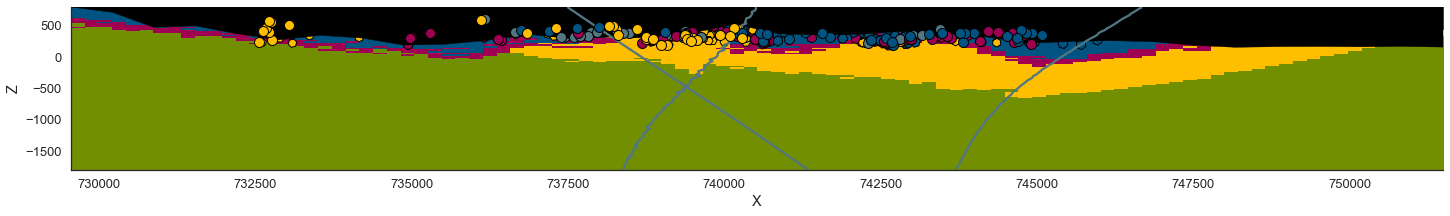

In [25]:
gp.plot.plot_section(geo_model, 4, direction='y',show_topo=True, show_data=True, show_faults=True, show_all_data=True)

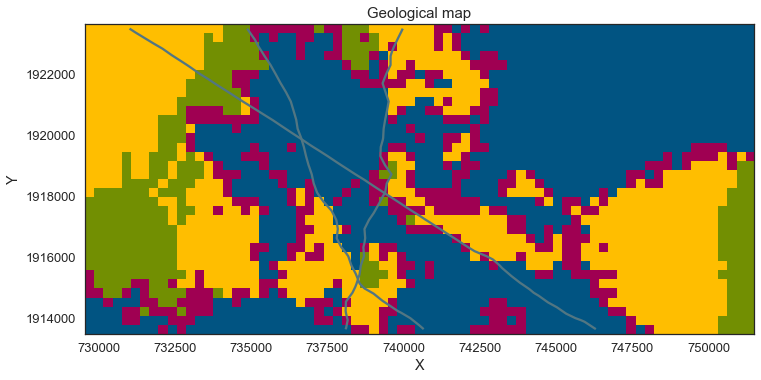

In [26]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False, show_faults=True)

In [27]:
np.save('Ales_vert2', geo_model.solutions.vertices)
np.save('Ales_edges2', geo_model.solutions.edges)